# Aula 6 - Correlação e Normalidade

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Testes de normalidade
- 2) Correlação

___
___
___

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

___
___
___



## 1) Testes de normalidade


Vamos agora ver alguns **teste estatísticos** que são utilizados para determinar se uma amostra segue uma distribuição normal ou não.

Os testes que faremos vão retornar dois resultados:

- **Estatística de teste**: uma quantidade numérica calculada pelo teste utilizando os dados da amostra;
- **p-value**: um valor de probabilidade que é utilizado para interpretar o resultado do teste.

O teste irá **assumir que a amostra analisada foi construída a partir de uma distribuição normal**. 

Essa é a **HIPÓTESE NULA ($H_0$) do teste**.

O que o p-value nos dá é **a probabilidade de termos encontrado o valor da estatística de teste assumindo a hipótese nula**.

Ou seja, se a amostra de fato for normal, qual é a probabilidade de termos encontrado o valor da estatística de teste?

Se essa probabilidade for **muito baixa**, quer dizer que **seria extremamente improvável que encontrássemos aquele valor pra estatística de teste se de fato a amostra fosse normal**, e, portanto, dizemos que os dados **nos dão evidência suficiente para rejeitar a hipótese nula: ou seja, a amostra NÃO é normal.**

Se, por outro lado, o p-value for alto, isso quer dizer que **falhamos em rejeitar a hipótese nula** -- não podemos dizer que a a amostra *não* é normal. Isso não quer dizer que a hipótese nula é verdadeira -- mas não temos evidências a favor de sua rejeição.

Em geral, o p-value ser "pequeno" ou "grande" se dá em termos de um **nível de significância** $\alpha$, que normalmente é tomado como  $\alpha = 5\%$. 

Assim, a forma simples de interpretar os resultados do teste, é:

- $ p \leq \alpha \ ( p \leq 0.05) \ $: rejeitamos a $H_0$: distribuição amostral não é normal;

- $ p > \alpha \ ( p > 0.05) \ $: falhamos em rejeitar a $H_0$: distribuição amostral normal;

Se você quiser saber mais sobre testes de normalidade, [clique aqui!](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/), ou [aqui](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411)

Vamos agora conhecer alguns testes! 

______

Vamos criar duas amostras, uma claramente normal, e outra não:

<AxesSubplot:ylabel='Count'>

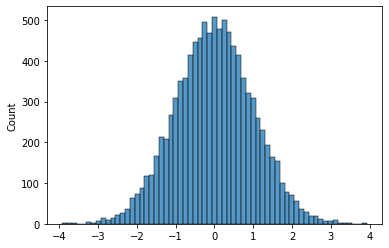

In [2]:
np.random.seed(42)
normal = np.random.normal(0, 1, 10000)

sns.histplot(normal)

<AxesSubplot:ylabel='Count'>

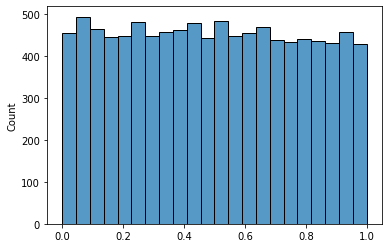

In [3]:
np.random.seed(42)
uniforme = np.random.rand(10000)

sns.histplot(uniforme)

__D’Agostino’s K^2 Test__

O teste K^2 de D’Agostino’s é baseado nas estatísticas descritivas **kurtosis** e **skewness**:

- **Skewness** é uma medida de **assimetria** da distribuição, isto é, o quanto ela é deslocada para a esquerda ou direita.
    - **A distribuição normal tem skewness igual a 0**

- **Kurtosis** quantifica a porção dos dados na **cauda** da distribuição -- ou seja, valores mais extremos.
    - **A distribuição normal tem kurtosis igual a 3**

<img src="https://i.pinimg.com/originals/0f/c7/66/0fc7666e8c1ab2822ad7a8e4fb534b88.gif" width=500>

Para detalhes como o teste funciona, [clique aqui](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test)

A função `normaltest()` do scipy aplica o teste a determinado conjunto de dados. A função retorna ambos a estatística de teste e o respectivo p-value.

In [4]:
# importa o teste
from scipy.stats import normaltest
    
# fazendo o teste
test_stat, p = normaltest(normal)

In [5]:
normaltest(normal)

NormaltestResult(statistic=0.33214260688733543, pvalue=0.8469858390291732)

In [6]:
# importa o teste
from scipy.stats import normaltest
    
# fazendo o teste
test_stat, p = normaltest(normal)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# interpretação do teste
# nível de significância de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 0.33214260688733543

p-value: 0.8469858390291732

Falha em rejeitar H_0: amostra parece ser normal


In [7]:
# importa o teste
from scipy.stats import normaltest
    
# fazendo o teste
test_stat, p = normaltest(uniforme)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# interpretação do teste
# nível de significância de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 7896.094621837173

p-value: 0.0

Rejeição da H_0: amostra não é normal


______

__Shapiro-Wilk Test__

O teste de Shapiro-Wilk é um dos testes de normalidade mais comuns e confiáveis, embora haja algumas sugestões de que o teste funcione melhor para amostras pequenas (algumas milhares de observações ou menos).

Para detalhes como o teste funciona, [clique aqui](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

A função `shapiro()` do scipy aplica o teste a determinado conjunto de dados. A função retorna ambos a estatística de teste (W) e o respectivo p-value.

In [8]:
# importa o teste
from scipy.stats import shapiro

# fazendo o teste
test_stat, p = shapiro(retornos.dropna())

print("Estatística de teste:", test_stat)
print("\np-value:", p)

# interpretação do teste
# nível de significância de 5%
alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

NameError: name 'retornos' is not defined

_______
________
______

## 2) Correlação

Um dos conceitos mais importantes em Data Science é o da **correlação**.

A partir de estudos de correlação, é possível **descobrirmos como diferentes variáveis interagem**.

<img src="https://www.mathsisfun.com/data/images/correlation-examples.svg" width=700>

É bem importante distinguirmos correlações **lineares** de **não lineares**. 

<img src="https://miro.medium.com/max/1414/1*ZMwog-_YcD0qBHc9_1T1-w.png" width=700>

Para fazer a distinção acima, há testes específicos!

Para ilustrar as noções de correlação, vamos utilizar uma base de dados de alturas e pesos:

### 2.1) Coeficiente de correlação de Pearson

Este coeficiente expressa a **taxa de relação linear entre duas variáveis numéricas**. Quanto mais próximo de 1 ou -1, mais **linearmente correlacionado estão as variáveis testadas**

**Suposições:**
 - as observações são idependentes uma das outras e identicamente distribuidas.
 - as observações têm distribuição normal;
 
 **Interpretações:**
 - $H_0$: as amostras são linearmente independentes, isso é, não estão correlacionadas linearmente;
 - $H_1$: as amostras estão linearmente correlacionadas.


Vamos ver um exemplo concreto, utilizando uma base que contém informações de [peso e altura](https://www.kaggle.com/mustafaali96/weight-height) de diversas pessoas

In [ ]:
df_wh = pd.read_csv('../datasets/weight-height.csv')

In [ ]:
df_wh

In [ ]:
# passando altura de polegadas pra centimetros
df_wh["Height"] = df_wh["Height"] * 2.54

# passando peso de libras pra quilos
df_wh["Weight"] = df_wh["Weight"] / 2.2046

df_wh

In [ ]:
df_wh.describe()

Note que a mediana e a média são bem próximas... Isso é um indicativo de normalidade!

__Vamos dar uma olhada na distribuição da altura e do peso...__

In [ ]:
sns.histplot(data=df_wh, x="Height", hue="Gender", kde=True)

In [ ]:
sns.histplot(data=df_wh, x="Weight", hue="Gender", kde=True)

Parece que as variáveis de fato são normalmente distribuídas!

Podemos fazer um teste de normalidade para ter um pouco mais de certeza...

Será que as variáveis estão relacionadas?

In [ ]:
sns.jointplot(data=df_wh, x="Height", y="Weight", hue="Gender")

Vamos olhar separadamenter para o sexo...

In [ ]:
sns.jointplot(data=df_wh[df_wh["Gender"]=="Male"], x="Height", y="Weight")

In [ ]:
sns.jointplot(data=df_wh[df_wh["Gender"]=="Female"], x="Height", y="Weight", color="orange")

Aperentemente há uma relação **linear** entre as variáveis! 

Vamos dar uma olhada no teste de Pearson:

In [ ]:
import scipy

scipy.stats.pearsonr(df_wh["Weight"], df_wh["Height"])

Separadamente para os sexos:

In [ ]:
scipy.stats.pearsonr(df_wh[df_wh["Gender"] == "Male"]["Weight"], df_wh[df_wh["Gender"] == "Male"]["Height"])

In [ ]:
scipy.stats.pearsonr(df_wh[df_wh["Gender"] == "Female"]["Weight"], df_wh[df_wh["Gender"] == "Female"]["Height"])

Em ambos os casos (e para todos os dados), obtivemos um coeficiente de pearson bem próxima de 1!

E o p-valor foi 0, isso é: rejeitamos $H_0$, o que implica que as duas amostras **estão correlacionadas linearmente**!

___________

### 1.2) Coeficiente de correlação de Spearman

Este coeficiente indica se as amostras possuem correlação *monotônica*, isso é, **se aumentarmos ou diminuimos uma, a outra irá aumentar ou diminuir**. 

O coeficiente varia entre -1 e 1:

> Quanto mais próximo de 1 for o coeficiente, mais positivamente correlacionada as amostras, isso é, se aumentarmos uma, a outra ira aumentar (ou se diminuimos uma, a outra irá diminuir); 

> Quanto mais próximo de -1 for o resultado, mais negativamente correlacionada estão as variáveis, isso é, aumentando uma, a outra irá dimunuir (ou se diminuímos uma, a outra irá aumentar). 

> Uma correlação de 0 indica ausência de correlação.

**Importante:** o coeficiente de Spearman **não** indica correlação necessariamente linear!

**Suposições:** 
 - as observações são idependentes uma das outras e identicamente distribuidas.

 
 **Interpretação:**
 - $H_0$: as variáveis são independentes; ou
 - $H_1$ as variáveis são monotonicamente dependentes.

Ao analisarmos os valores da base de altura e peso, é natural que tenhamos um coeficiente de Spearman próximo de 1, dado que percebemos claramente uma relação monotônica entre a svariáveis:

In [ ]:
scipy.stats.spearmanr(df_wh[df_wh["Gender"] == "Female"]["Weight"], df_wh[df_wh["Gender"] == "Female"]["Height"])

In [ ]:
scipy.stats.spearmanr(df_wh[df_wh["Gender"] == "Male"]["Weight"], df_wh[df_wh["Gender"] == "Male"]["Height"])

Vamos analisar outra base?

Desta vez, olharemos para uma base com informações relativas a [câncer de mama](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

In [ ]:
df_bc = pd.read_csv('../datasets/breast_cancer.csv')

In [ ]:
df_bc

In [ ]:
df_bc.info()

In [ ]:
df_bc.describe()

Vamos dar uma olhada na distribuição das variáveis numéricas! (E não precisamos olhar pro ID...)

In [ ]:
for col in df_bc.drop(columns=["id", "diagnosis"]).columns:
    
    plt.title("Distribuição da coluna " + col)
    
    sns.histplot(data = df_bc, x = col, kde=True, hue="diagnosis")

    plt.show()

Nenhuma tem distribuição normal... Neste caso, temos que usar o teste de correlação de spearman, para pelo menos buscarmos alguma correlação monotônica!

Vamos olhar, por exemplo, para as variáveis "radius_mean" e "area_mean":


In [ ]:
sns.jointplot(data=df_bc, x="radius_mean", y="area_mean")

In [ ]:
sns.jointplot(data=df_bc, x="radius_mean", y="area_mean", hue="diagnosis")

Claramente parece haver alguma correlação! Vamos ver o que o teste de spearman diz:

In [ ]:
scipy.stats.spearmanr(df_bc["radius_mean"], df_bc["area_mean"])

Correlação bem próxima de 1, com p-value 0!

Dessa forma, com um nível de significância de 5%, rejeitamos $H_0$, ou seja, as variáveis **são positivamente monotônicamente dependentes!**

Caso queiramos avaliar a correlação de outras variáveis:

In [ ]:
df_bc.corr(method="spearman")

In [ ]:
plt.figure(figsize=(10, 10))

sns.heatmap(df_bc.corr(method="spearman"))

In [ ]:
plt.figure(figsize=(20, 20))

sns.heatmap(df_bc.corr(method="spearman"), annot=True, fmt=".2f")